<a href="https://colab.research.google.com/github/RafaelSilvaGodoy/PosCienciaDeDados/blob/master/Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [34]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer = 'github')

In [35]:
import pandas as pd

In [36]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/POS_SEMESTRE1/Ciência de Dados/Aula1/olist_sellers_dataset.csv')

In [37]:
print(df_clientes.head(3))

                        customer_id  ... customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1  18955e83d337fd6b2def6b18a428ac77  ...             SP
2  4e7b3e00288586ebd08712fdd0374a03  ...             SP

[3 rows x 5 columns]


In [38]:
# Quantidade de cidades diferentes
print(len(df_clientes.customer_city.unique()))

# Quantidade de clientes diferentes
print(len(df_clientes.customer_unique_id.unique()))

4119
96096


In [39]:
df_group = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_group[ (df_group['customer_id'] >= 2) ].head(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
00172711b30d52eea8b313a7f2cced02,2,2,2,2
004288347e5e88a27ded2bb23747066c,2,2,2,2
004b45ec5c64187465168251cd1c9c2f,2,2,2,2
0058f300f57d7b93c477a131a59b36c3,2,2,2,2
00a39521eb40f7012db50455bf083460,2,2,2,2


In [40]:
df_clientes.groupby(by= 'customer_city' ).count().sort_values( by= 'customer_id', ascending = False ).head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
campinas,1444,1444,1444,1444
porto alegre,1379,1379,1379,1379


In [41]:
df_clientes.customer_city.value_counts().head(7)

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
campinas           1444
porto alegre       1379
Name: customer_city, dtype: int64

In [42]:
df_clientes.customer_city.value_counts().head(7).reset_index()

,index,customer_city
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379


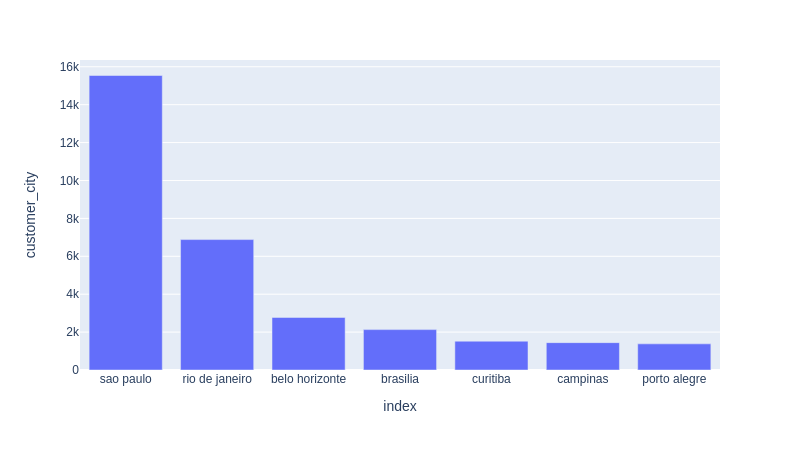

In [43]:
import plotly.express as px

data = df_clientes.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city')
gitly.show( fig )